In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

C:\Users\ralma\AppData\Local\Temp\ipykernel_10920\2487901451.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,52.250923,56.873521,43.187517,46.641481,855215656
2007-10-08,49.576054,54.016863,49.264417,54.016863,126671715
2007-10-09,52.952103,53.419555,46.927146,49.602017,116725709
2007-10-10,53.445526,54.536252,52.978074,54.328493,67931378
2007-10-11,59.418545,62.327146,52.978076,62.327146,106320954


In [5]:
df.shape

(4208, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [7]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,96.993948,98.274104,95.733170,97.047037,1.188963e+07
std,58.421394,59.078350,57.723628,58.403033,2.061999e+07
min,30.124784,32.202355,27.008428,32.046537,0.000000e+00
25%,55.906149,56.587854,55.159525,55.964583,4.799653e+06
50%,78.428329,80.129335,77.246710,78.752943,8.344398e+06
75%,108.118114,109.241308,107.007916,108.137602,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [9]:
df = df.reset_index()

In [10]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [11]:
df.to_csv("powergrid.csv")

In [12]:
data01 = pd.read_csv("powergrid.csv")

In [13]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,52.25092315673828,56.87352079210541,43.1875167592935,46.64148069529059,855215656
2,1,2007-10-08,49.576053619384766,54.016862537626224,49.26441654631749,54.016862537626224,126671715
3,2,2007-10-09,52.95210266113281,53.419554713185995,46.92714553268396,49.60201670610783,116725709
4,3,2007-10-10,53.445526123046875,54.53625229612375,52.97807406164678,54.328493084779,67931378


In [14]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [16]:
# df = df.drop(['Date', 'Adj Close'], axis = 1)

In [17]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,52.250923,56.873521,43.187517,46.641481,855215656
1,2007-10-08,49.576054,54.016863,49.264417,54.016863,126671715
2,2007-10-09,52.952103,53.419555,46.927146,49.602017,116725709
3,2007-10-10,53.445526,54.536252,52.978074,54.328493,67931378
4,2007-10-11,59.418545,62.327146,52.978076,62.327146,106320954


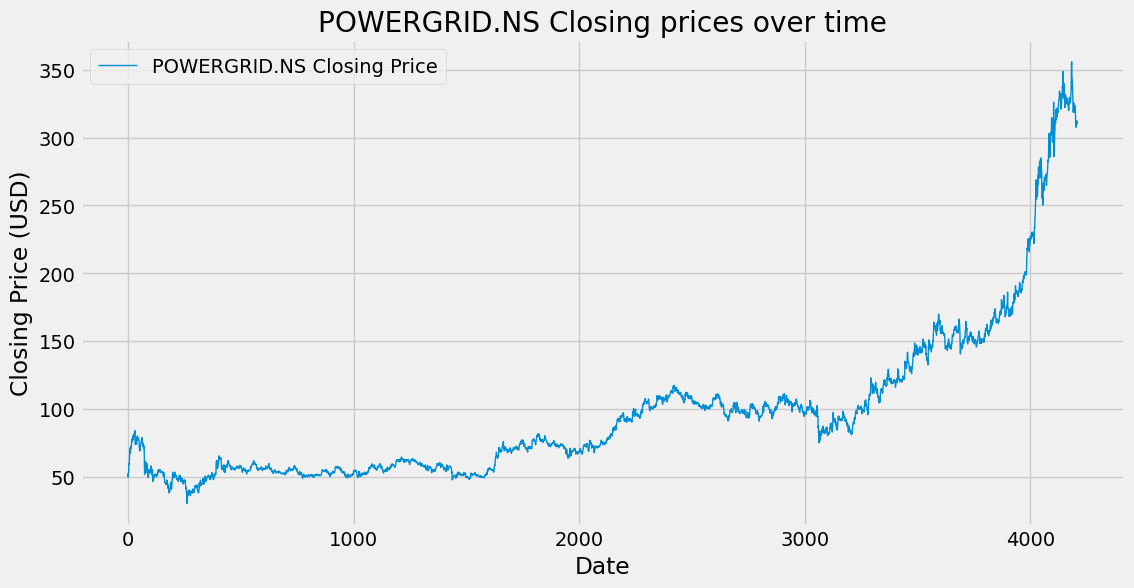

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

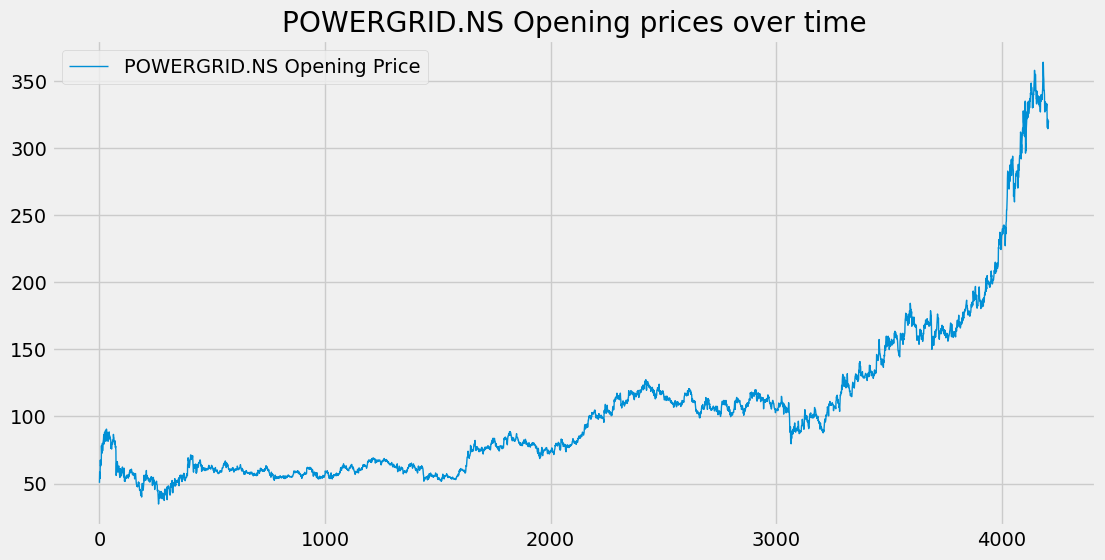

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

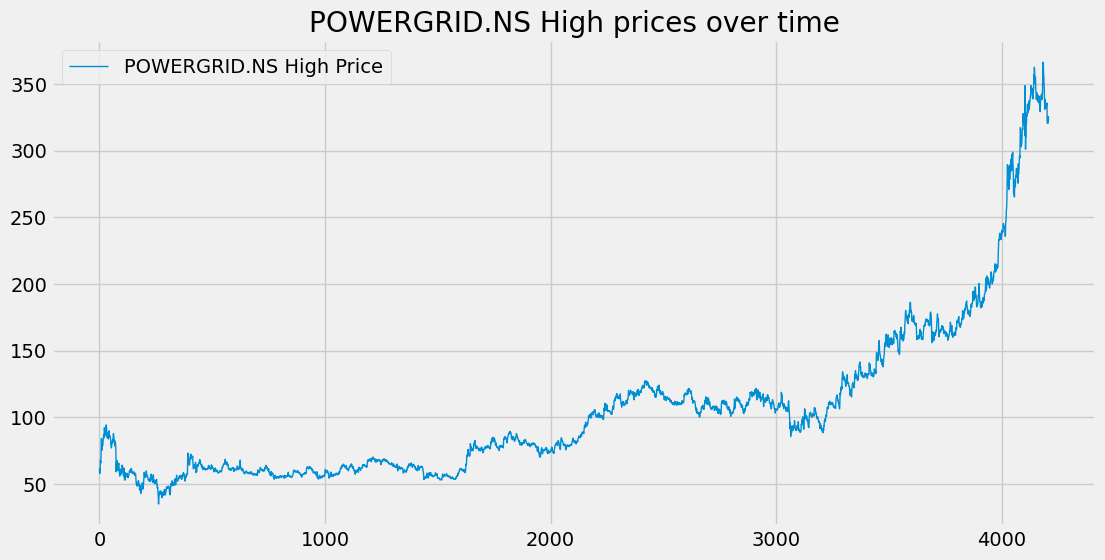

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

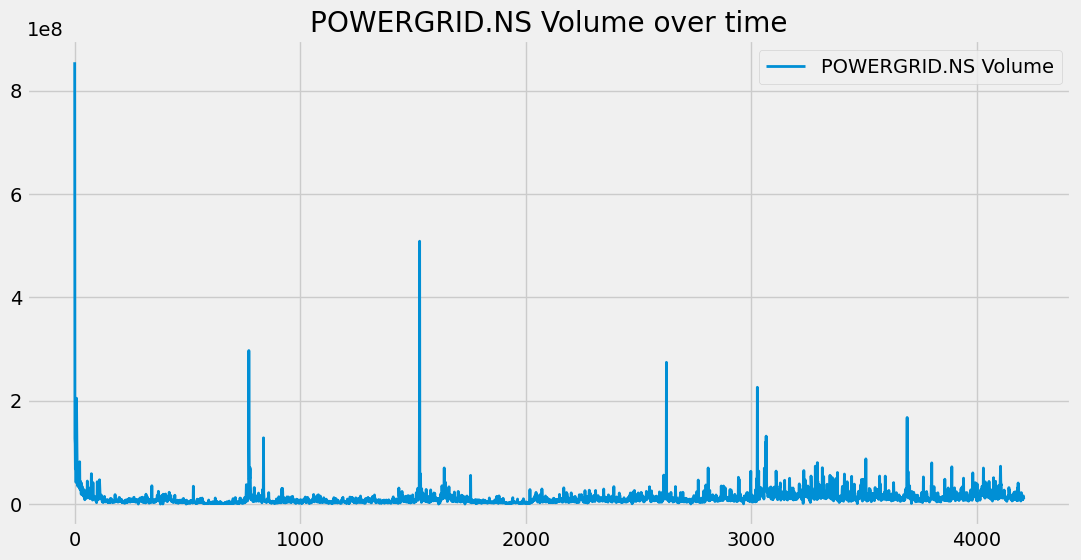

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [19]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [20]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [21]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [22]:
ma100 = df.Close.rolling(100).mean()

In [23]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993564
4204,325.235135
4205,325.471087
4206,325.670631


In [24]:
ma200 = df.Close.rolling(200).mean()

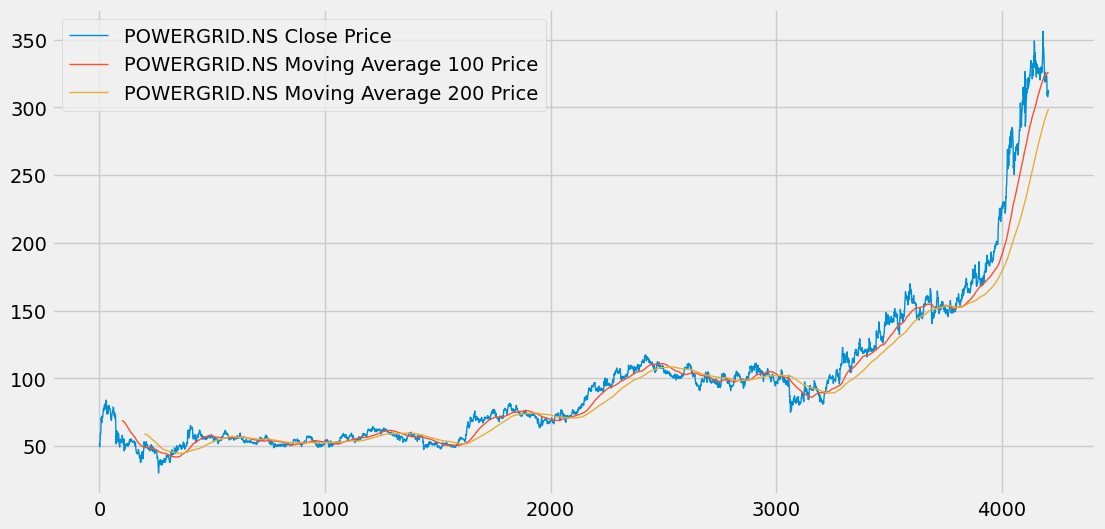

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [26]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [27]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

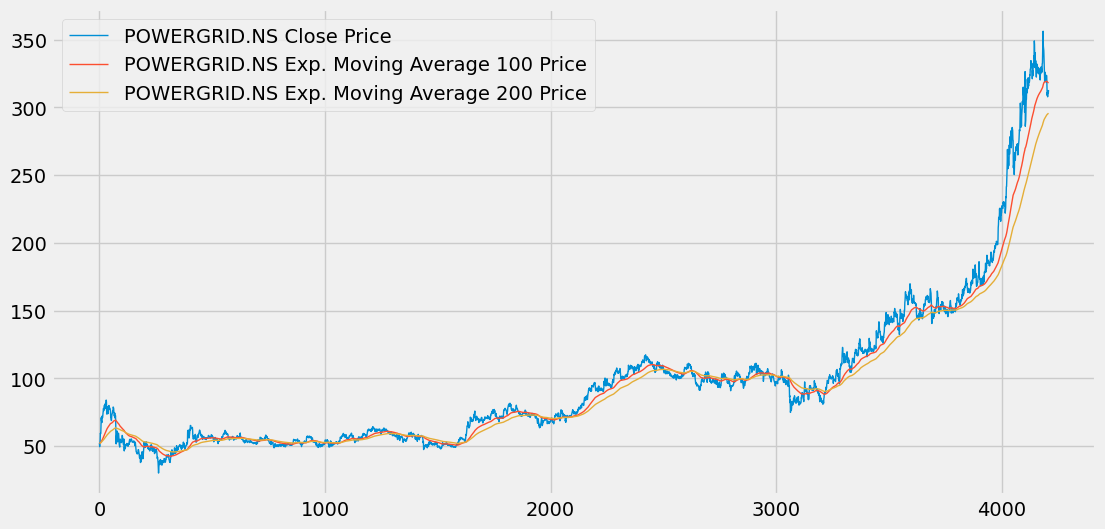

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [29]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [30]:
data_training.shape

(2945, 1)

In [31]:
data_testing.shape

(1263, 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [33]:
data_training_array = scaler.fit_transform(data_training)

In [34]:
data_training_array

array([[0.25364694],
       [0.2229831 ],
       [0.26168504],
       ...,
       [0.82286399],
       [0.77582619],
       [0.78862758]])

In [35]:
data_training_array.shape[0]

2945

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [37]:
x_train.shape

(2845, 100, 1)

In [38]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [39]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\ralma\OneDrive\Desktop\Pisa\DATA MINING\tf_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - loss: 0.0957
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - loss: 0.0089
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - loss: 0.0079
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - loss: 0.0062
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - loss: 0.0062
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - loss: 0.0058
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - loss: 0.0055
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - loss: 0.0057
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - loss: 0.0051
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - loss: 0.0054
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - loss: 0.0049
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - loss: 0.0043
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - loss: 0.0042
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - loss: 0.0035
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [42]:
past_100_days = data_training.tail(100)

In [44]:
# final_df = past_100_days.append(data_testing, ignore_index = True)
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [46]:
final_df.head()

Ticker,POWERGRID.NS
0,96.814827
1,98.788528
2,99.126137
3,98.918373
4,99.489708


In [47]:
input_data = scaler.fit_transform(final_df)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [49]:
x_test.shape

(1263, 100, 1)

In [50]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [51]:
y_predicted.shape

(1263, 1)

In [52]:
scaler.scale_

array([0.00355564])

In [53]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

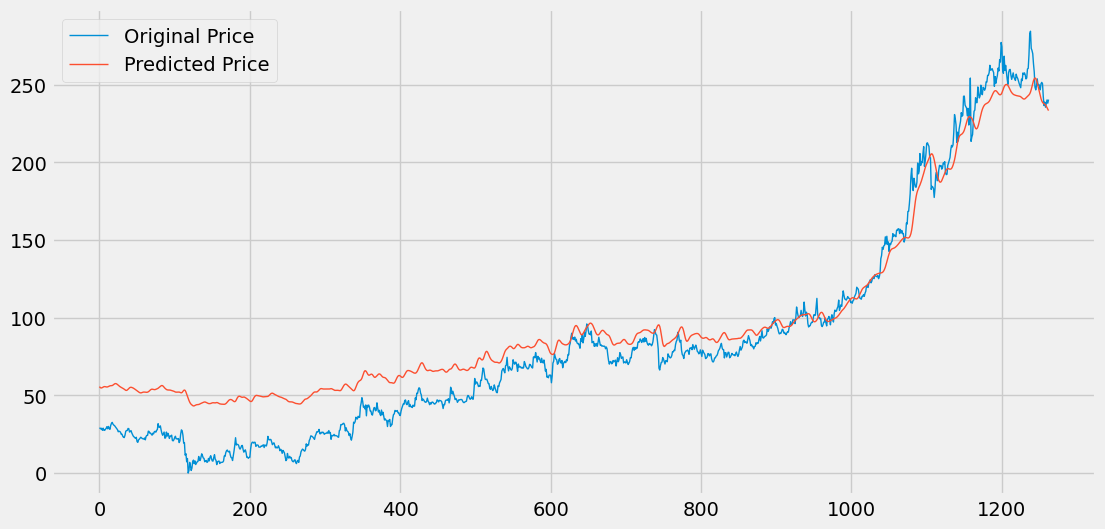

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [55]:
model.save('stock_dl_model.h5')